# Zillow Housing Data


# Questions 
1. Which state/city was the hardest hit by the housing crash at 2008
2. Which state/city recovered the best from the housing crash
3. Relation between the economic status and economic downturn

## Importing Modules

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading files

In [84]:
df_city = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/City_time_series.csv")
df_state = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/State_time_series.csv")
df_metro = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/Metro_time_series.csv")
df_zip = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/Zip_time_series.csv")


In [3]:
df_city.iloc[:,:15].describe()

,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom
count,682004.000000,757344.000000,757344.000000,8179.000000,79445.000000,257451.000000,145716.000000,40242.000000,532690.000000,64006.000000,8261.000000,509516.000000,6.906000e+03
mean,13.670389,163.157957,163.072337,261.436326,164.278818,142.699738,154.559990,193.797363,150.982524,196.306876,109.427173,150.130540,2.128321e+05
std,41.222843,458.443248,459.170168,172.445632,117.211839,94.708711,104.068999,178.658590,103.121671,134.788048,105.886492,104.604103,1.407270e+05
min,0.008600,2.000000,2.000000,26.422764,18.564356,19.411786,19.989265,16.526473,18.201754,22.357724,14.948454,18.201754,1.670000e+04
25%,2.458200,37.000000,36.000000,146.982054,92.076167,91.216216,98.570020,99.707884,92.267728,111.538462,48.988689,91.563757,1.184625e+05
50%,5.376000,72.000000,72.000000,212.000000,130.233414,117.542153,124.638205,133.591540,123.453560,154.001686,71.862934,122.536941,1.867500e+05
75%,11.538925,154.000000,154.000000,335.714286,191.641104,160.572797,170.923649,220.669822,171.788684,242.465030,128.294210,170.935484,2.750000e+05
max,2251.748200,31940.000000,32610.000000,1434.470377,1341.346154,2071.403891,1552.466402,2021.511307,2086.458333,1589.171975,941.749972,2086.458333,1.185000e+06


## Sorting Year in date

In [86]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['Year'] = df_city['Date'].apply(lambda x: x.year)
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_state['Year'] = df_state['Date'].apply(lambda x: x.year)


## Get correlations between columns. Between Listing price of different housing type in order to reduce columns

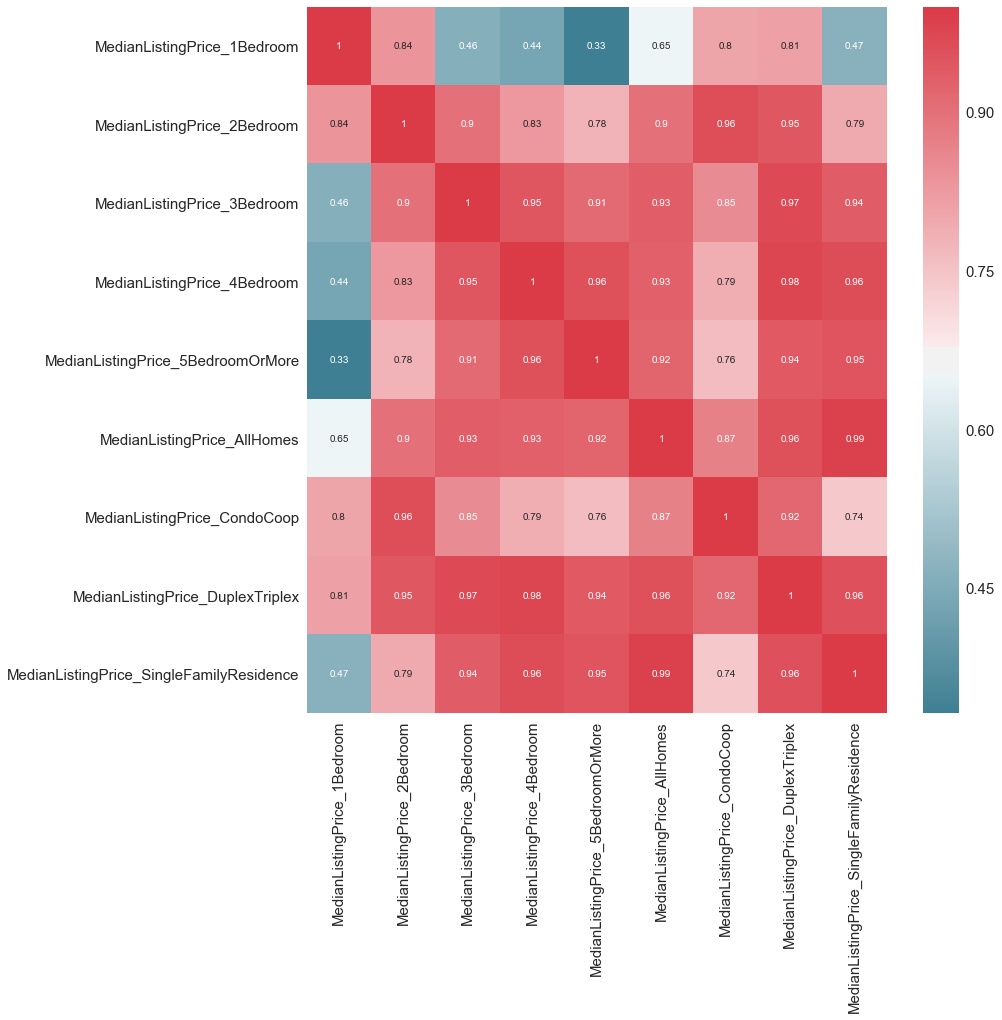

In [87]:


df_city1 = df_city[['MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence']]

corr = df_city1.corr()
sns.set(rc={'figure.figsize':(13,13)}, font_scale=1.5)
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size":10})
plt.show()

Categories that are highly correlated from the above heat map:
- DuplexTriplex & 4 Bedroom
- SingleFamily & All homes
- CondoCoop with 2 Bedroom
- Interestingly 1 Bedroom and SingleFamily actually has negative correlations

# Relations between all the listing price. 

In [88]:
df_city_boxplot = df_city1.drop(['MedianListingPrice_DuplexTriplex','MedianListingPrice_AllHomes','MedianListingPrice_CondoCoop'],axis=1)
#df_city1.MedianListingPrice_5BedroomOrMore[np.abs(df_city1.MedianListingPrice_5BedroomOrMore-df_city1.MedianListingPrice_5BedroomOrMore.mean())<=(5*df_city1.MedianListingPrice_5BedroomOrMore.std())]
df_city_boxplot1 = df_city_boxplot.rename(index=str, columns={"MedianListingPrice_1Bedroom":"1Bedroom",
 'MedianListingPrice_2Bedroom':'2Bedroom',
 'MedianListingPrice_3Bedroom':'3Bedroom',
 'MedianListingPrice_4Bedroom':'4Bedroom',
 'MedianListingPrice_5BedroomOrMore':'5+Bedroom',
 'MedianListingPrice_SingleFamilyResidence':'SingleFamily'})



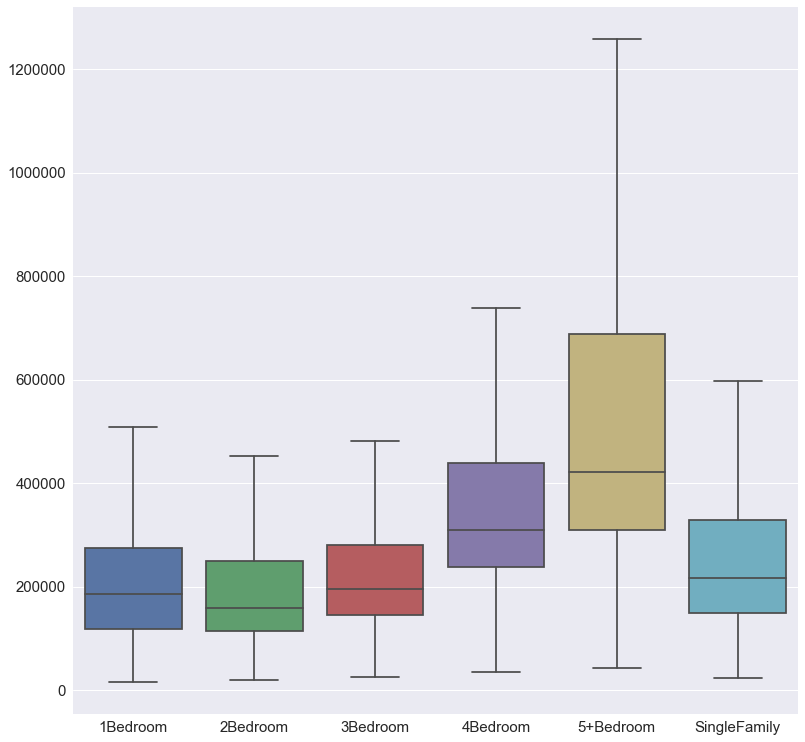

In [89]:

ax = sns.boxplot(data=df_city_boxplot1,fliersize=5, showfliers=False)

- Boxplot shows the biggest difference in 5+Bedroom and single family. 5+bedroom is due to widerange of house sizes.
- 4 bedroom type also has high variance. 

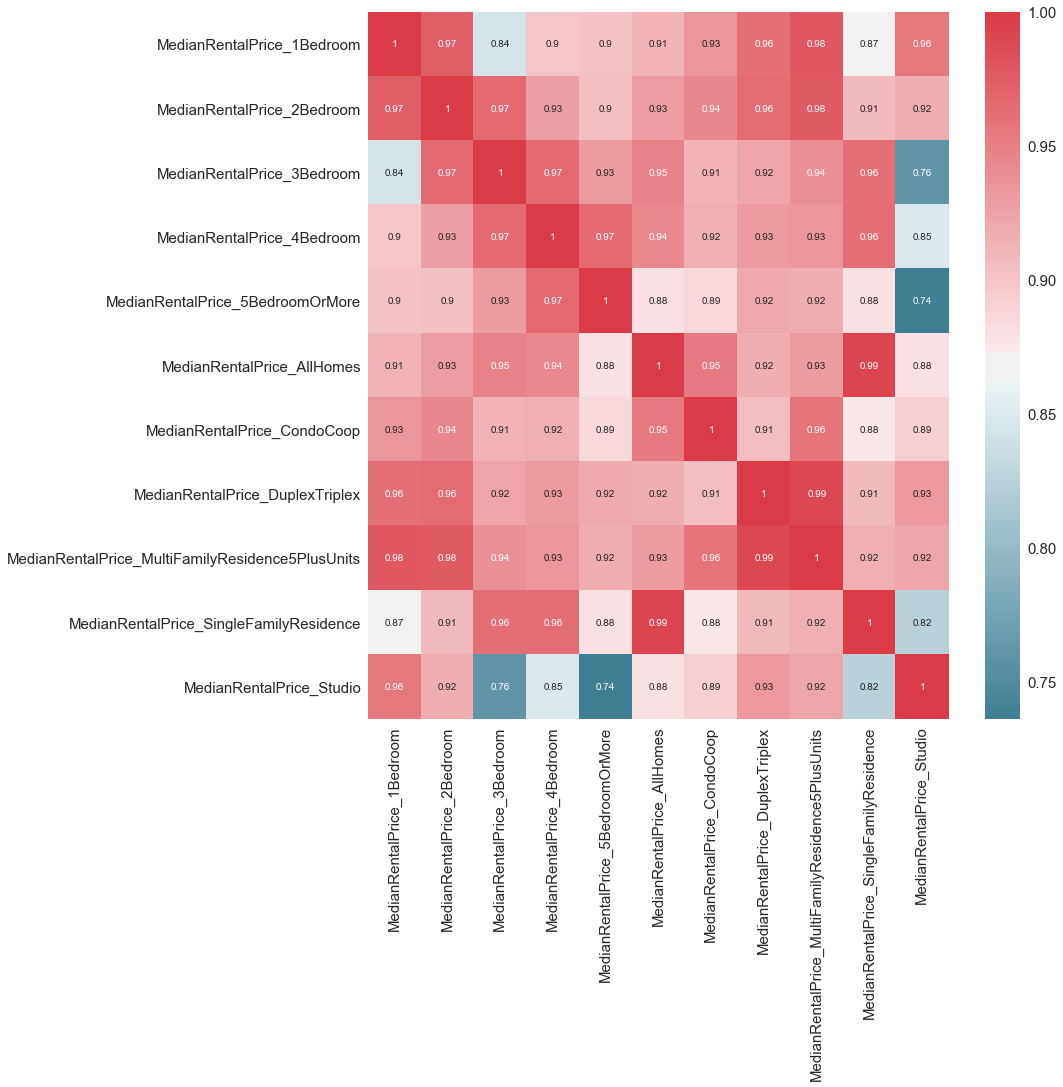

In [90]:

df_city2 = df_city[[ 
 'MedianRentalPrice_1Bedroom',
 'MedianRentalPrice_2Bedroom',
 'MedianRentalPrice_3Bedroom',
 'MedianRentalPrice_4Bedroom',
 'MedianRentalPrice_5BedroomOrMore',
 'MedianRentalPrice_AllHomes',
 'MedianRentalPrice_CondoCoop',
 'MedianRentalPrice_DuplexTriplex',
 'MedianRentalPrice_MultiFamilyResidence5PlusUnits',
 'MedianRentalPrice_SingleFamilyResidence',
 'MedianRentalPrice_Studio']]

corr1 = df_city2.corr()
#print(corr1)
sns.set(font_scale=1.5)
sns.heatmap(corr1,mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size":10})
plt.show()

Only category with the highest correlation is AllHomes and SingleFamilyResidence.
AllHomes will be removed in future analysis

In [91]:
df_city_boxplot_rental = df_city2.drop(['MedianRentalPrice_AllHomes'],axis=1)
df_city_boxplot2 = df_city_boxplot_rental.rename(index=str, columns={"MedianRentalPrice_1Bedroom":"1Bedroom",
 'MedianRentalPrice_2Bedroom':'2Bedroom',
 'MedianRentalPrice_3Bedroom':'3Bedroom',
 'MedianRentalPrice_4Bedroom':'4Bedroom',
 'MedianRentalPrice_5BedroomOrMore':'5+Bedroom',
 'MedianRentalPrice_SingleFamilyResidence':'SingleFamily', 
 'MedianRentalPrice_CondoCoop':'CondoCoop',
 'MedianRentalPrice_DuplexTriplex':'DuplexTriplex',
 'MedianRentalPrice_MultiFamilyResidence5PlusUnits':'MultiFamily',
 'MedianRentalPrice_SingleFamilyResidence':'SingleFamily',
 'MedianRentalPrice_Studio':'Studio'})

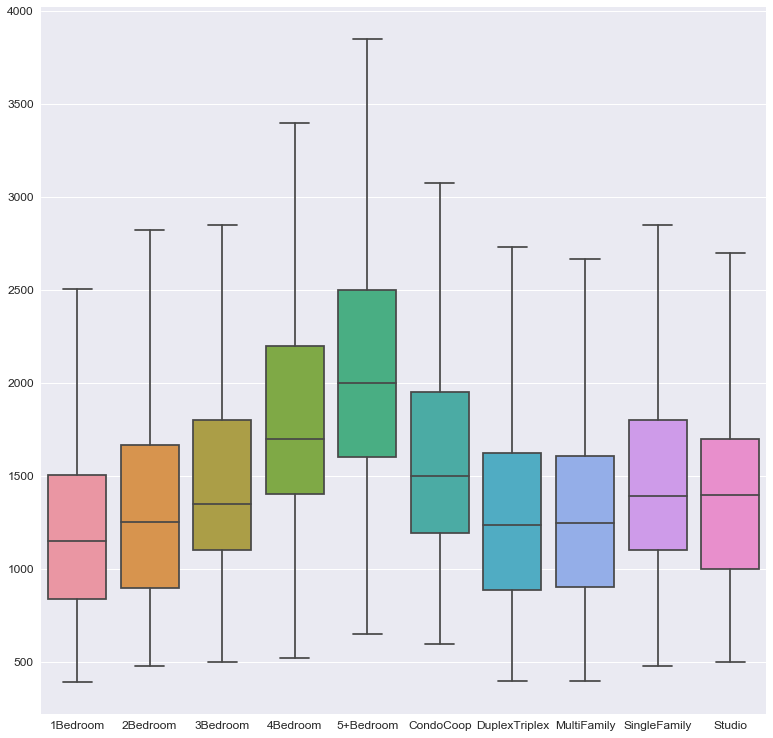

In [92]:
sns.set(rc={'figure.figsize':(13,13)},font_scale=1.2)
ax = sns.boxplot(data=df_city_boxplot2,fliersize=5, showfliers=False)

The median rental price of different types of houses

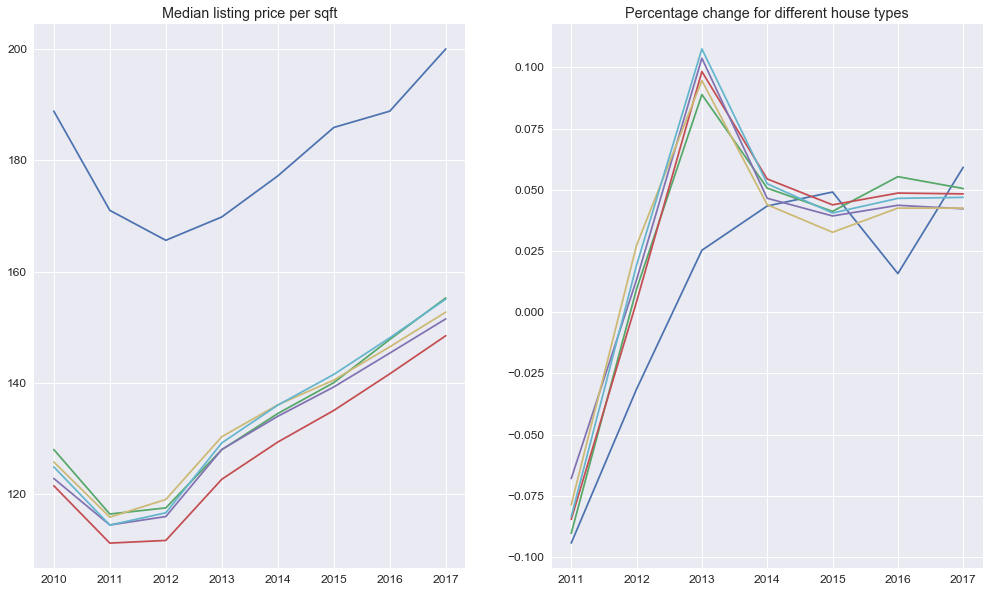

In [103]:
plt.figure(figsize=(17, 10))

plt.subplot(1,2,1)
plt.plot(df_state.groupby(df_state['Year'])[
                    'MedianListingPricePerSqft_1Bedroom', 
                    'MedianListingPricePerSqft_2Bedroom',
                    'MedianListingPricePerSqft_3Bedroom',
                    'MedianListingPricePerSqft_4Bedroom',
                    'MedianListingPricePerSqft_5BedroomOrMore',
                    'MedianListingPricePerSqft_AllHomes'].mean())
plt.title('Median listing price per sqft')

plt.subplot(1,2,2)
plt.plot(df_state.groupby(df_state['Year'])[
                    'MedianListingPricePerSqft_1Bedroom', 
                    'MedianListingPricePerSqft_2Bedroom',
                    'MedianListingPricePerSqft_3Bedroom',
                    'MedianListingPricePerSqft_4Bedroom',
                    'MedianListingPricePerSqft_5BedroomOrMore',
                    'MedianListingPricePerSqft_AllHomes'].mean().pct_change())
plt.title('Percentage change for different house types')
plt.show()

For the graph above: 
- Price per sqft 1 bedroom is high compared to other types of houses
- Lowest price per squarefoot is 3 bedroom house type
- All home types follow the same price trend
- The first house is a big investment when compared to other houses when compared on per squarefoot basis
- All home types follow the same percentage change except for one bed room
- One can conclude that one bedroom houses are bad investment because it is slow to recover and it is the most volatile. 

 # 1. Which state/city was the hardest hit by the housing crash at 2008?

Exploring median listing price for state and city
- Top 20 Turnover state after 2008
- Extracting Year from date and getting the mean value. Only display the top 20 value

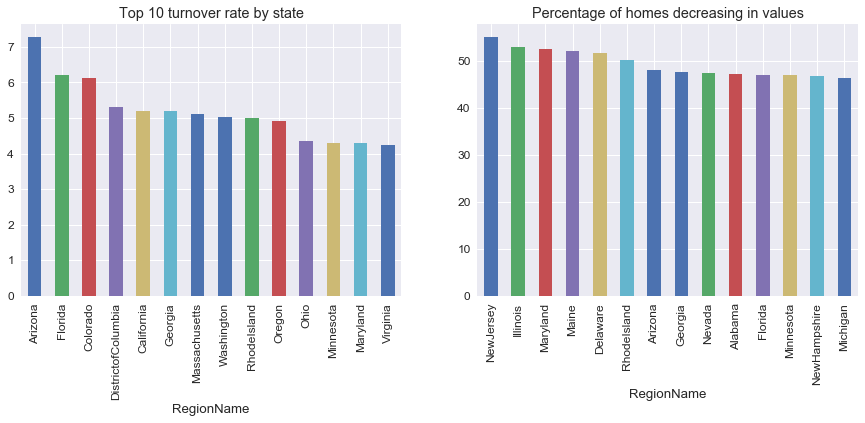

In [13]:
df_state_year = df_state[df_state['Year']>2007]
plt.subplot(1,2,1)
df_state_year.groupby(df_state_year['RegionName'])['Turnover_AllHomes'].mean().sort_values(ascending=False).head(15)[1:21].plot(figsize=(15,5),kind='bar')
plt.title('Top 10 turnover rate by state')

plt.subplot(1,2,2)
df_state_year.groupby(df_state_year['RegionName'])['PctOfHomesDecreasingInValues_AllHomes'].mean().sort_values(ascending=False).head(15)[1:21].plot(figsize=(15,5),kind='bar')
plt.title('Percentage of homes decreasing in values')

plt.show()



These are the states that were hit the hardest by the financial crisis.
- Showing overall turnover rate and percentage of homes decreasing in values. 
- States that appear on both siginifies that people are increasing the turnover rate while selling the house at a loss. 
- States that are on both graph: Arizona, Florida, Georgia, Minnesota, and Maryland. 
- I will create a new datafram that only consist of the 5 states. 

In [33]:
#create a list with all the state name
#push each string into a dict.
#list = ['Ariz']

# list_states = ['Arizona','california','new york']

# df_state={}

# for each in list_states:
#   df_state[each] = df_state[df_state['RegionName'].str.contains(each)]

#list_states = ['Arizona','Florida','Colorado','DistrictofColumbia','California','Connecticut','Arkansas','Delaware','Alabama']
df_state_az = df_state[df_state['RegionName'].str.contains('Arizona')]
df_state_fl = df_state[df_state['RegionName'].str.contains('Florida')]
df_state_mn = df_state[df_state['RegionName'].str.contains('Minnesota')]
df_state_md = df_state[df_state['RegionName'].str.contains('Maryland')]
df_state_ga = df_state[df_state['RegionName'].str.contains('Georgia')]
frames = [df_state_az ,df_state_fl , df_state_mn , df_state_md , df_state_ga]
df_state_distressed = pd.concat(frames)


# Which of the states recovered the most since 2008?

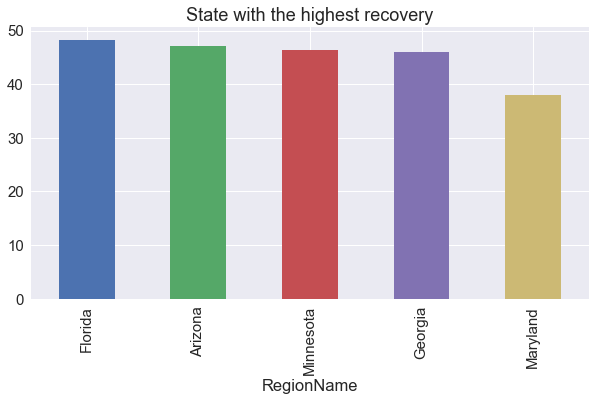

In [34]:
df_state_distressed5 = df_state_distressed[df_state_distressed['Year']>2007]
df_state_distressed5.groupby(df_state_distressed5['RegionName'])['PctOfHomesIncreasingInValues_AllHomes'].mean().sort_values(ascending=False).plot(figsize=(10,5),kind='bar')
plt.title('State with the highest recovery')
plt.show()

These states were the states that were hit the hardest during the economic downturn. However, Maryland is still trailing in terms of recovery. This could present an investment opportunity since it shows that there are still room for growth.

## Comparing foreclousre rate of the top and bottom recovery state in terms.

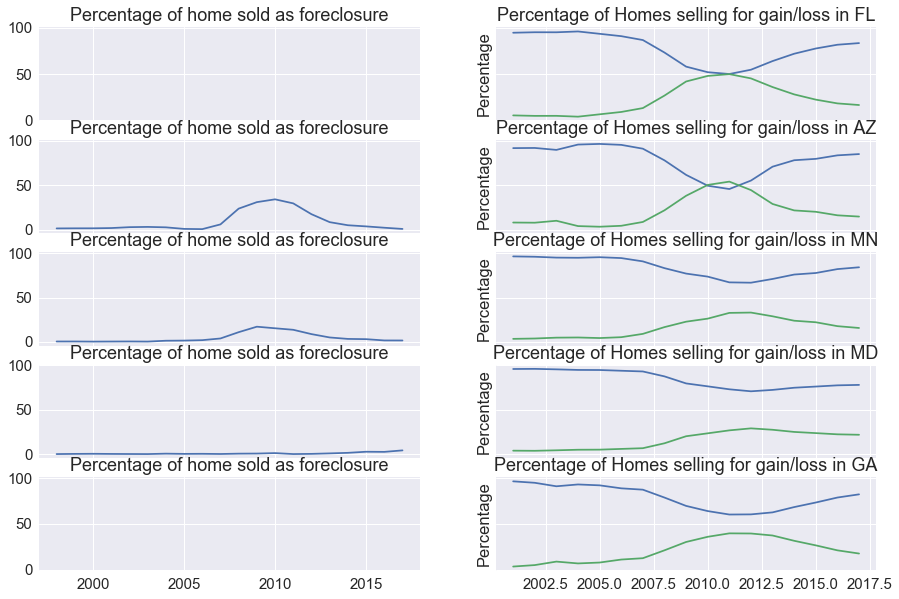

In [53]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2, sharex='col', sharey='row')

#FL
ax1.plot(df_state_fl.groupby(df_state_fl['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
ax1.set_title('Percentage of home sold as foreclosure')

ax2.plot(df_state_fl.groupby(df_state_fl['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
ax2.set_title('Percentage of Homes selling for gain/loss in FL')
ax2.set_ylabel('Percentage')

#AZ
ax3.plot(df_state_az.groupby(df_state_az['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
ax3.set_title('Percentage of home sold as foreclosure')

ax4.plot(df_state_az.groupby(df_state_az['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
ax4.set_title('Percentage of Homes selling for gain/loss in AZ')
ax4.set_ylabel('Percentage')

#MN
ax5.plot(df_state_mn.groupby(df_state_mn['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
ax5.set_title('Percentage of home sold as foreclosure')

ax6.plot(df_state_mn.groupby(df_state_mn['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
ax6.set_title('Percentage of Homes selling for gain/loss in MN')
ax6.set_ylabel('Percentage')

#MD
ax7.plot(df_state_md.groupby(df_state_md['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
ax7.set_title('Percentage of home sold as foreclosure')

ax8.plot(df_state_md.groupby(df_state_md['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
ax8.set_title('Percentage of Homes selling for gain/loss in MD')
ax8.set_ylabel('Percentage')

#ga
ax9.plot(df_state_ga.groupby(df_state_ga['Year'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean())
ax9.set_title('Percentage of home sold as foreclosure')

ax10.plot(df_state_ga.groupby(df_state_ga['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean())
ax10.set_title('Percentage of Homes selling for gain/loss in GA')
ax10.set_ylabel('Percentage')
plt.show()
#NEED TO ADD LEGEND

**GA** and **FL** do not have data on percentage of home sold as foreclosure. 
- AZ had the highest foreclosure rate out of the 5 states. The percentage of home selling for gain actually crossed with percentage of home selling for loss, which means that there were more houses that were selling for loss than gains during 2010-2012 period. 
- Even though **FL** does not have foreclosure rate, but we can see from the percentage graph that it has very similar trend as **AZ**, which means that it probably suffered just as much when compared to **AZ**
- **MD**'s percentage of home sold as foreclosure remain fairly flat. 

# Let's get forclosure rate city by city

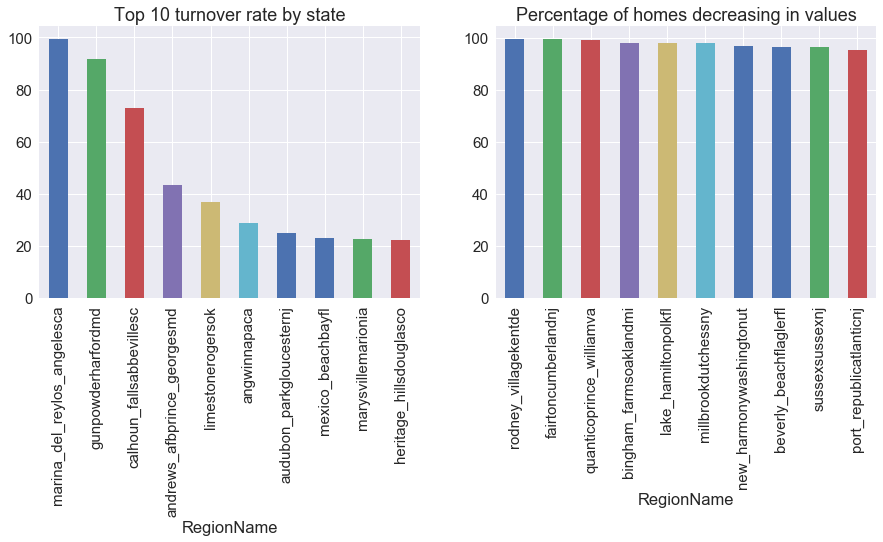

In [57]:
# df_city_ct = df_city[df_city['RegionName'].str.endswith('ct')]
# df_city_ct_year = df_city_ct[df_city_ct['Year']>2007]
# df_city_ct.groupby(df_city_ct_year['RegionName'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().sort_values(ascending=False).head(10).plot(figsize=(10,5),kind='bar')
#this gets rid of the address above the graph
# plt.title('Top 10 Home sold as foreclosures ratios')
#increase font size for x axis. Y axis label

df_city_year = df_city[df_city['Year']>2007]
plt.subplot(1,2,1)
df_city_year.groupby(df_city_year['RegionName'])['Turnover_AllHomes'].mean().sort_values(ascending=False).head(10).plot(figsize=(15,5),kind='bar')
plt.title('Top 10 turnover rate by state')

plt.subplot(1,2,2)
df_city_year.groupby(df_city_year['RegionName'])['PctOfHomesDecreasingInValues_AllHomes'].mean().sort_values(ascending=False).head(10).plot(figsize=(15,5),kind='bar')
plt.title('Percentage of homes decreasing in values')

plt.show()


The hardest hit cities are mostly small towns in **NJ**, and **FL**. 

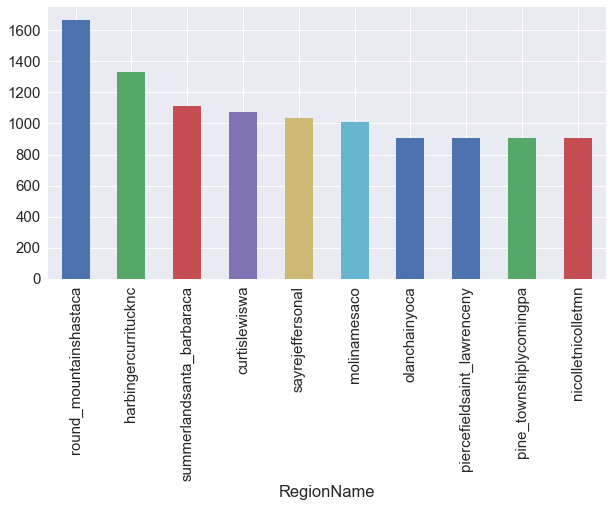

In [68]:
df_city.groupby(df_city['RegionName'])['HomesSoldAsForeclosuresRatio_AllHomes'].mean().sort_values(ascending=False).head(10).plot(figsize=(10,5),kind='bar')
plt.show()

As confirmed by the foreclosure rate of all homes, the hardest hit by the economic downturn are small towns across America. 

## Creating scatter plot of price at different zip code

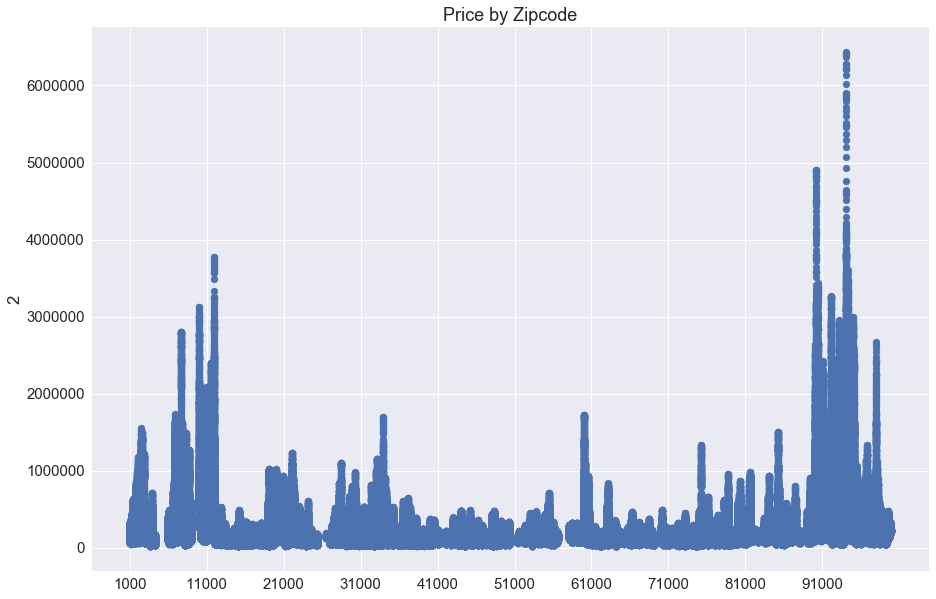

In [75]:
plt.scatter(df_zip.RegionName,df_zip.ZHVI_AllHomes)
plt.title('Zillow housing value index by Zipcode')
plt.ylabel('')
plt.xticks(np.arange(min(df_zip.RegionName)-1, max(df_zip.RegionName)+1, 10000))
plt.show()
#add finer indexes

Average homes values across america spread according to different zipcode. Highest home price range from 90000-95000. 

Text(0.5,1,'Days on zillow by zipcode')

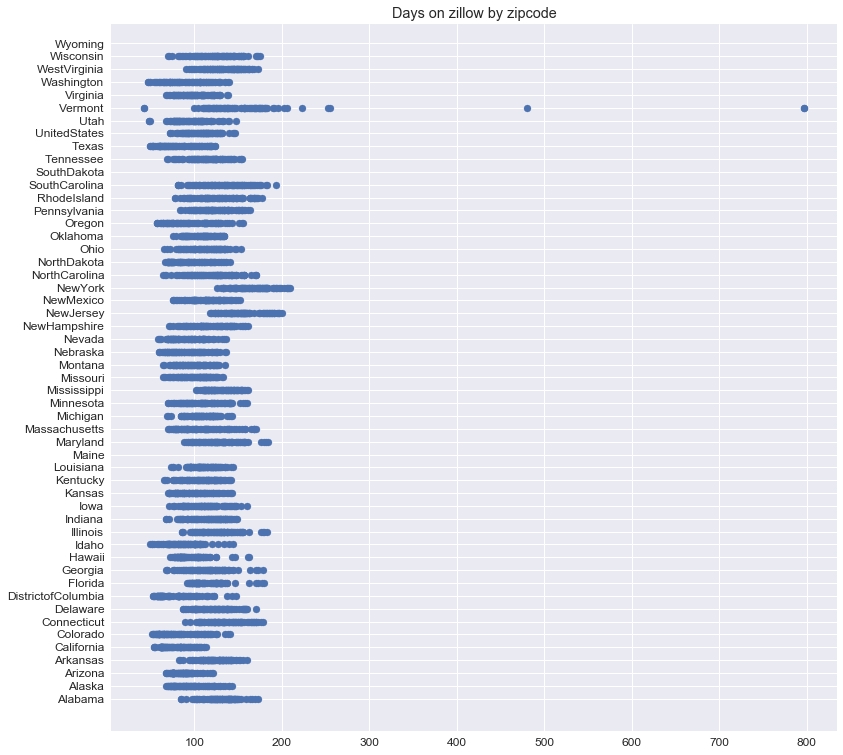

In [23]:
plt.scatter(df_state['DaysOnZillow_AllHomes'],df_state['RegionName'])
plt.title('Days on zillow by zipcode')
#Remove outliers
#pick 3-4 states and focus on cities

The above shows interesting data. New York has relatively high Days on zillow. On the other hand, Arizona, which was hardest hit by the economic crisis, has one of the lower days on zillow  for all the states. This means that the houses generally sell faster in Arizona than other places. 

Text(0.5,1,'price/rental relations by zipcode')

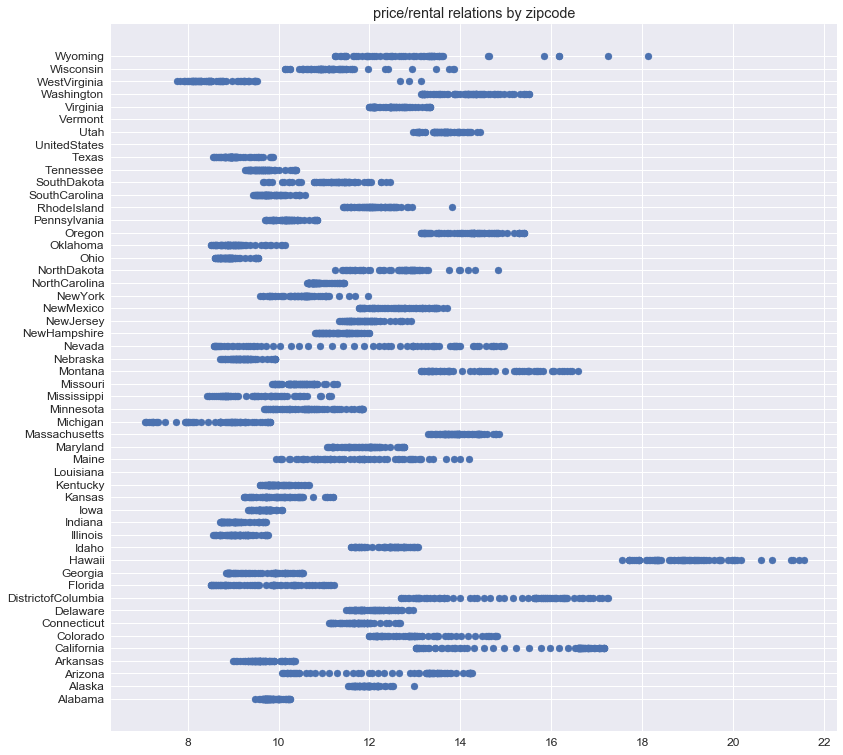

In [24]:
plt.scatter(df_state['PriceToRentRatio_AllHomes'],df_state['RegionName'])
plt.title('price/rental relations by zipcode')
#sort the graph based on the minimum value
#extract min and sort the states

- The states with the highest price to rent ratio is Hawaii, which means it is probably better to buy than rent in these high price to rent ratio. 
- This will make a nice investment. Since the rent will be high, which will make covering for mortgage much easier.
- The high rent could also means that there are less people that want to settle there and there will always be demand for short term rental for tourist.
- Even though NY is known for high rent, but the houses are sold for higher price as well, which lowers the price to rent ratio. 
- It may be a better investment decision to buy houses in higher price to rent ratio states and to rent in lower price to rent ratio states. The money used to pay mortgage in lower price to rent ratio states could be used in other investment to get better return. 

# 3. Relation between the economic status and economic downturn
# Assuming economic status by the tier of houses that you live in. 

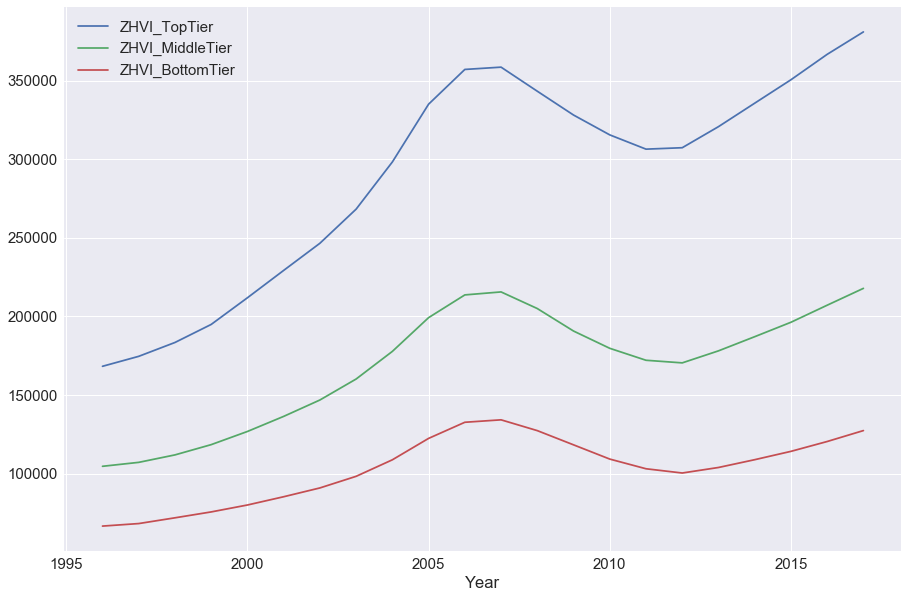

In [73]:
df_state.groupby(df_state['Year'])['ZHVI_TopTier','ZHVI_MiddleTier','ZHVI_BottomTier'].mean().plot()
plt.show()

- Different tier is categorized by the value of the house

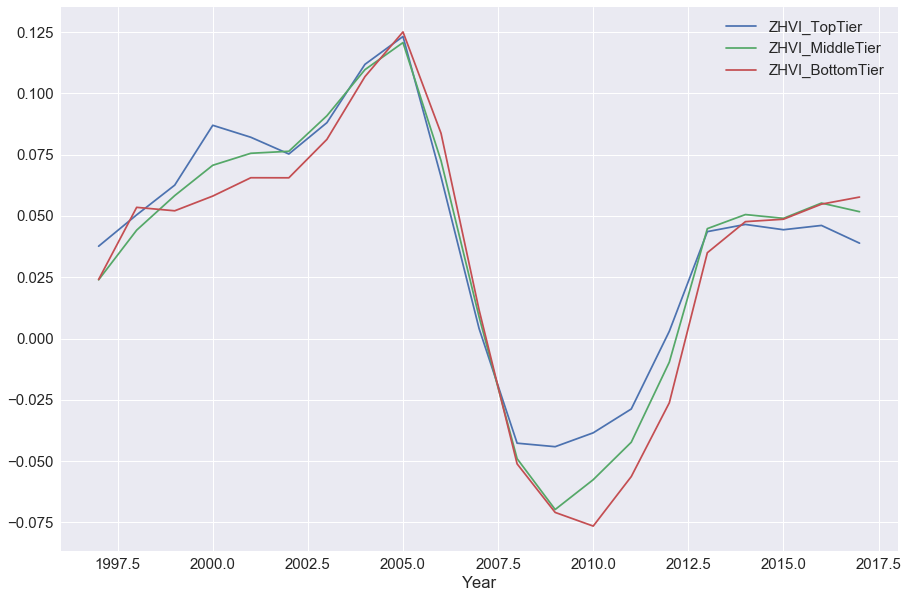

In [74]:
df_state.groupby('Year')['ZHVI_TopTier','ZHVI_MiddleTier','ZHVI_BottomTier'].mean().pct_change().plot()
plt.show()

- Percentage change Year over year
- Top tier is affected the least by the economic downturn and recovered the fastest. 
- Bottom tier has been affected the most and recovred the slowest. However, the data seems to suggest that the bottom tier has had higher percentage change for the past 2 years when compared to top and mid tier. 
- The bottom tier does not get as much of the "upside" of the market and it crashes the hardest during economic turmoil. 